In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [2]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [41]:
# Import data
df_train = pd.read_csv('Documents/data/train_v2.csv')
df_test = pd.read_csv('Documents/data/test_v2.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
# Store target variable of training data in a safe place
loss_train_ = df_train.loss
loss_test_ = pd.read_csv('Documents/data/sampleSubmission.csv')

In [43]:
# 合并target
loss_train=pd.DataFrame(loss_train_)
loss_test=loss_test_.drop(columns=['id'])
target = pd.concat([loss_train,loss_test])
print(target.shape)
type(target)

(316415, 1)


pandas.core.frame.DataFrame

In [44]:
#合并train and test

data = pd.concat([df_train.drop(['loss'], axis=1), df_test])
#删掉 'id'列
df_data = data.drop(columns=['id'])
#查看
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316415 entries, 0 to 210943
Columns: 769 entries, f1 to f778
dtypes: float64(655), int64(95), object(19)
memory usage: 1.8+ GB


In [45]:
# View head of 'Name' column
df_data.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
210939,140,9,0.802220,3600,10.0,9836,831.0,491.0,128.28,138.80,...,-12.54,3,6.22,-4.55,7.01,0.2130,-0.7890,0,1,13
210940,154,9,0.477440,3600,3.0,80502,4283.0,280.0,154.13,153.84,...,-9.64,20,5.98,-4.13,3.02,0.2582,0.4792,1,1,41
210941,150,8,0.480407,4400,7.0,14507,78.0,1502.0,150.75,150.20,...,-1.12,4,0.41,-0.16,0.08,0.1552,0.8375,1,1,20
210942,135,8,0.223248,2700,16.0,13700,9572.0,5151.0,131.42,134.49,...,-29.81,51,20.39,-15.14,11.75,0.2411,0.7004,0,0,513
210943,166,7,0.870420,5300,4.0,81409,1584.0,2823.0,161.68,164.88,...,-7.02,10,5.83,-4.96,4.30,0.3003,1.1379,0,1,1212


In [ ]:
#用均值替代df_data中的NA
import math
df_data_ = df_data.replace('NA',math.nan)
X = df_data_.fillna(df_data_.mean())

In [8]:
#保存数据集
#df_data.info()
df_data.to_csv('~/Documents/data/df_data.csv')
target.to_csv('~/Documents/data/loss.csv')

In [11]:
#合并df_data和target
dataset = pd.concat([df_data, target], axis=1)
dataset.info()
dataset.to_csv('~/Documents/data/dataset.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316415 entries, 0 to 210943
Columns: 770 entries, f1 to loss
dtypes: float64(655), int64(96), object(19)
memory usage: 1.8+ GB


In [13]:
data_final = dataset.sample( n = 5000, replace=False, weights=None, random_state=1, axis=None)

In [14]:
data_final.shape

(5000, 770)

In [15]:
type(data_final)

pandas.core.frame.DataFrame

In [16]:
#保存数据
data_final.to_csv('~/Documents/data/sample.csv')

In [49]:
X = data_final.drop(columns=['loss'])
y_ = data_final['loss']

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 134382 to 132232
Columns: 769 entries, f1 to f778
dtypes: float64(655), int64(95), object(19)
memory usage: 29.5+ MB


In [50]:
#把loss函数转变为标签
def toLabels(d):
    i = 0
    while i< len(d):
        if d[i] != 0:
            d[i] = 1
        else:
            d[i] = 0
        i+=1
    return d

In [81]:
y = list(y_)

In [82]:
toLabels(y)

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [96]:
#把list格式转变为series
y = pd.Series(y)
type(y)

pandas.core.series.Series

In [ ]:
import numpy as np
import pandas as pd

#df_train = pd.read_csv('../input/train.csv')

target_count = y.value_counts()

print('Class 0:', class0)
print('Class 1:', class1)
print('Proportion:', round(class0 / class1, 2), ': 1')

target_count.plot(kind='bar', title='Count (y)')

数据集明显不平衡，违约用户：信用良好用户比例为 1:36

#

#

In [122]:
#发现X中数据类型有19个特征是obeject,把object数据类型转变成float
z = X.astype({'f137':float,'f138':float,'f206':float,'f207':float,'f276':float,'f277':float,'f338':float,'f390':float,'f391':float,'f419':float,'f420':float,'f469':float,'f472':float,'f534':float,'f537':float,'f626':float,'f627':float,'f695':float,'f698':float}, copy=True, errors='raise')

In [123]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 134382 to 132232
Columns: 769 entries, f1 to f778
dtypes: float64(674), int64(95)
memory usage: 29.4 MB


     ##cross-validation and no feature engineering:

In [136]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.60%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#Confusion matrix

Confusion matrix:
 [[966   0]
 [ 34   0]]


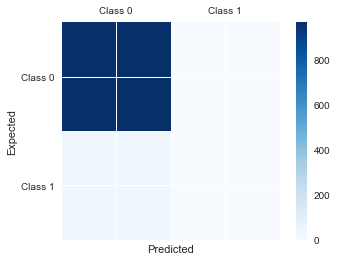

In [125]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Resampling

接下来对数据进行重采样

In [163]:
#把dataframe的row number变一下，以便方便合并z and y然后进行重采样
z_ = z.reset_index()
df_train = pd.concat([z_, y],axis=1)

In [164]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 771 entries, index to 0
dtypes: float64(674), int64(97)
memory usage: 29.4 MB


In [172]:
#把 df_train的最后一列“0”rename 为target

df_data=df_train.rename({0:'target'},axis=1)
df_data.info()
df_data.to_csv('Documents/data/df_data_clean_5000_771')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 771 entries, index to target
dtypes: float64(674), int64(97)
memory usage: 29.4 MB


###

###

In [110]:
df_data_ = pd.read_csv('Documents/data/df_data_clean_5000_771')
df_data_.info()
df_data_.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 772 entries, Unnamed: 0 to target
dtypes: float64(674), int64(98)
memory usage: 29.4 MB


,Unnamed: 0,index,f1,f2,f3,f4,f5,f6,f7,f8,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,target
4995,4995,200626,124,10,0.490002,1800,16.0,13203,587.0,1363.0,...,11,3.52,-2.37,1.65,0.2522,0.8809,0,0,394,0
4996,4996,26514,137,8,0.124547,1500,4.0,80537,1489.0,26.0,...,34,11.72,-9.03,7.31,0.3101,0.4170,0,0,107,0
4997,4997,108002,132,9,0.138820,1300,15.0,14522,8136.0,3681.0,...,4,1.76,-1.32,1.05,0.1918,-0.8204,0,0,394,0
4998,4998,41666,134,6,0.637717,1800,4.0,1078,5738.0,2337.0,...,26,12.03,-9.44,7.61,0.2478,0.8001,0,0,2,0
4999,4999,132232,148,8,0.608755,2200,4.0,8417,1723.0,4808.0,...,13,5.76,-0.88,5.67,0.2377,0.3928,0,0,107,0


In [112]:
#清楚数据集中的两列
df_data = df_data_.drop(columns=['Unnamed: 0','index'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 770 entries, f1 to target
dtypes: float64(674), int64(96)
memory usage: 29.4 MB


In [113]:
df_data.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,target
4995,124,10,0.490002,1800,16.0,13203,587.0,1363.0,129.54,125.23,...,11,3.52,-2.37,1.65,0.2522,0.8809,0,0,394,0
4996,137,8,0.124547,1500,4.0,80537,1489.0,26.0,134.05,136.30,...,34,11.72,-9.03,7.31,0.3101,0.4170,0,0,107,0
4997,132,9,0.138820,1300,15.0,14522,8136.0,3681.0,129.32,131.65,...,4,1.76,-1.32,1.05,0.1918,-0.8204,0,0,394,0
4998,134,6,0.637717,1800,4.0,1078,5738.0,2337.0,129.92,133.13,...,26,12.03,-9.44,7.61,0.2478,0.8001,0,0,2,0
4999,148,8,0.608755,2200,4.0,8417,1723.0,4808.0,131.41,149.99,...,13,5.76,-0.88,5.67,0.2377,0.3928,0,0,107,0


In [114]:
# Class count
count_class_0, count_class_1 = df_data.target.value_counts()

# Divide by class
df_class_0 = df_data[df_data['target'] == 0]
df_class_1 = df_data[df_data['target'] == 1]

Random under-sampling

Random under-sampling:
1    153
0    153
Name: target, dtype: int64


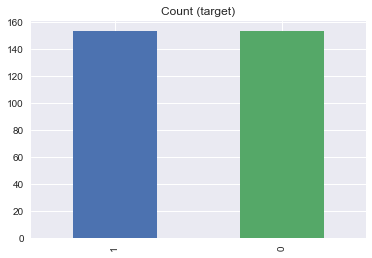

In [115]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)


print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

下采样导致丢失较多的信息


    Random over-sampling
    

Random over-sampling:
1    4847
0    4847
Name: target, dtype: int64


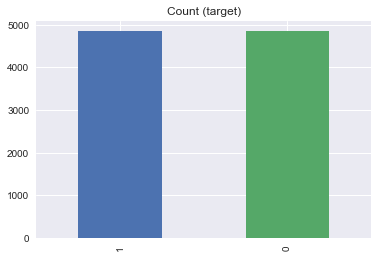

In [116]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)')

过采样容易导致过拟合

In [117]:
df_X = df_data.drop(columns=['target'])
df_y = df_data['target']
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 769 entries, f1 to f778
dtypes: float64(674), int64(95)
memory usage: 29.3 MB


In [118]:
#填补X的缺失值
X = df_X.fillna(df_X.mean())

In [119]:
np.all(np.isfinite(X))

True

In [120]:
type(df_y)

pandas.core.series.Series

In [121]:
type(X)

pandas.core.frame.DataFrame

In [122]:
np.any(np.isnan(X))

False

In [123]:
#把数据归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [124]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (5000, 769)
Reduced shape: (5000, 2)


Text(0,0.5,'Second principal component')

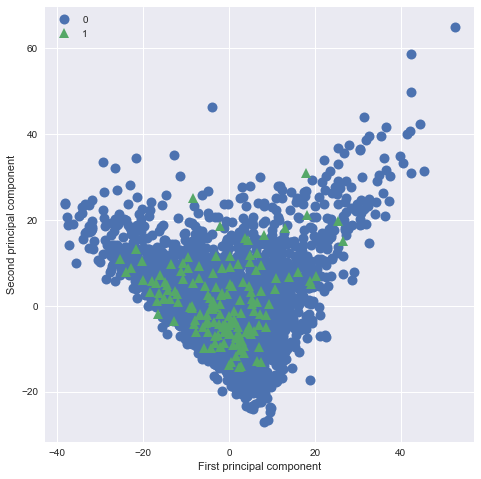

In [78]:
import mglearn
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], df_y)
plt.legend(['0','1'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

'''

Over-sampling followed by under-sampling

最终使用smote重采样方式对样本进行重采样

'''

In [125]:
import matplotlib


import matplotlib.pyplot as plt



import imblearn
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, df_y)
print("X_smt shape:{}".format(X_smt.shape))
print("y_smt shape:{}".format(y_smt.shape))

X_smt shape:(8930, 769)
y_smt shape:(8930,)


In [126]:
#把数据格式转变为series
y_smt = pd.Series(data= y_smt)


Class 0: 4471
Class 1: 4471
Proportion: 1.0 : 1


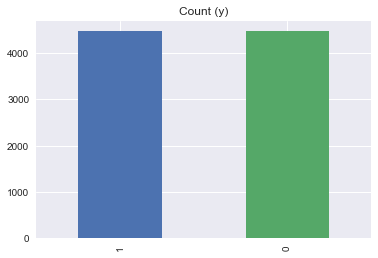

In [59]:
import numpy as np
import pandas as pd

#df_train = pd.read_csv('../input/train.csv')

target_count = y_smt.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (y)')





In [127]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_smt)

# transform data onto the first two principal components
X_smt_pca = pca.transform(X_smt)
print("Original shape: {}".format(str(X_smt.shape)))
print("Reduced shape: {}".format(str(X_smt_pca.shape)))

Original shape: (8930, 769)
Reduced shape: (8930, 2)


Text(0,0.5,'Second principal component')

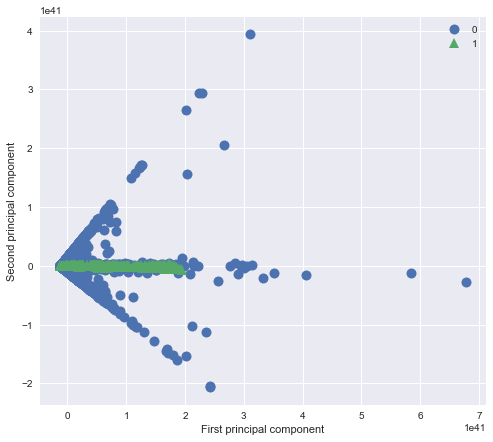

In [81]:
import mglearn
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_smt_pca[:, 0], X_smt_pca[:, 1], y_smt)
plt.legend(['0','1'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Model-based Feature Selection

In [145]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [146]:
X_smt_ = pd.DataFrame(X_smt)
X_smt = X_smt_.fillna(X_smt_.mean())
#X_smt.isna()

In [143]:
#print(np.isfinite(X_smt).all())

不存在无穷数字

In [142]:
#print(np.isnan(X_smt).any())

'''

Automatic Feature Selection
Univariate statistics

'''
方法一


In [148]:
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split




X_train, X_test, y_train, y_test = train_test_split(
    X_smt, y_smt, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (4465, 769)
X_train_selected.shape: (4465, 384)


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 30  31  32  34  35 668 690 691 692 726 754] are constant.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


([], <a list of 0 Text yticklabel objects>)

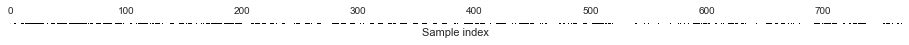

In [152]:
mask = select.get_support()
#print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

不存在空值

‘’‘

基于模型的特征选择

’‘’

方法二


In [161]:
scaler = StandardScaler()
scaler.fit(X_smt)
X_smt.scaled = scaler.transform(X_smt)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smt.scaled, y_smt, random_state=0, test_size=.5)

In [163]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [164]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (4465, 769)
X_train_l1.shape: (4465, 385)


([], <a list of 0 Text yticklabel objects>)

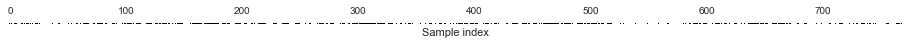

In [168]:
mask = select.get_support()
#print(mask)
#visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

'''

Iterative feature selection

'''

方法三

([], <a list of 0 Text yticklabel objects>)

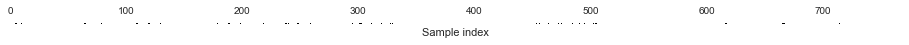

In [169]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)


# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [170]:
X_train_l3 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l3.shape))

X_train.shape: (4465, 769)
X_train_l1.shape: (4465, 40)


‘’‘

最终选择第一种特征选择方式对模型进行特征选择

‘’‘



‘’‘


模型建立



‘’‘’




from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data, target, random_state=0)

#特征选择
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())